In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PC\Downloads\loan_data.csv")
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [3]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

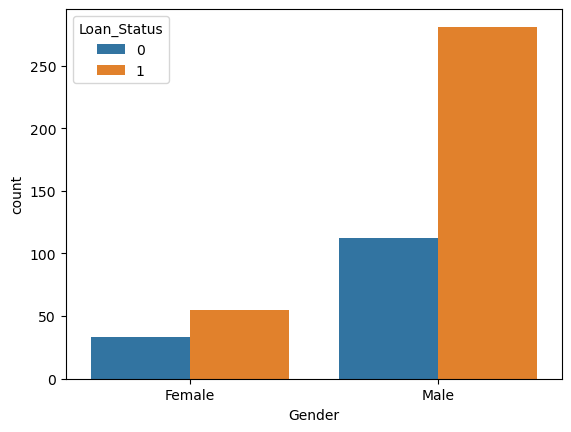

In [6]:
sns.countplot(data = df, x = "Gender", hue = "Loan_Status")

<Axes: xlabel='Credit_History', ylabel='count'>

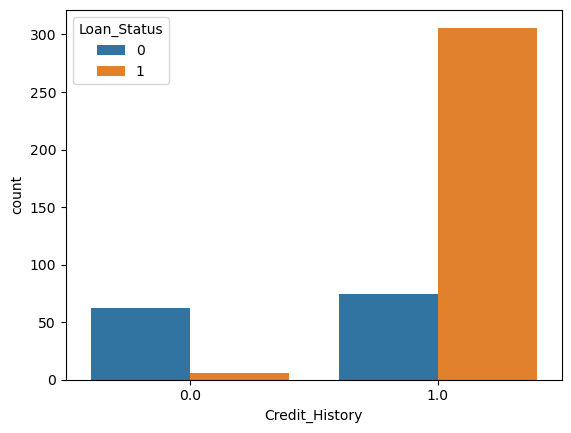

In [7]:
sns.countplot(data = df, x = "Credit_History", hue = "Loan_Status")

<Axes: xlabel='Property_Area', ylabel='count'>

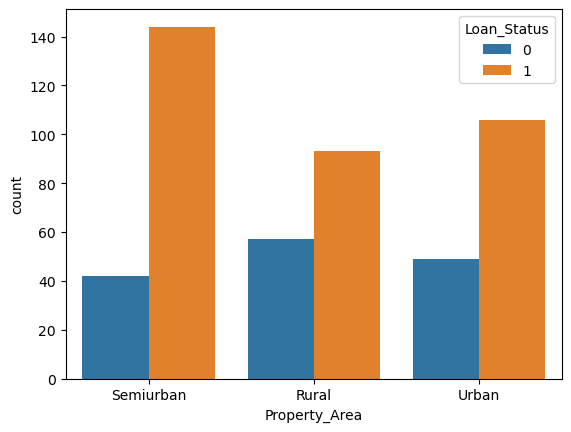

In [8]:
sns.countplot(data = df, x = "Property_Area", hue = "Loan_Status")


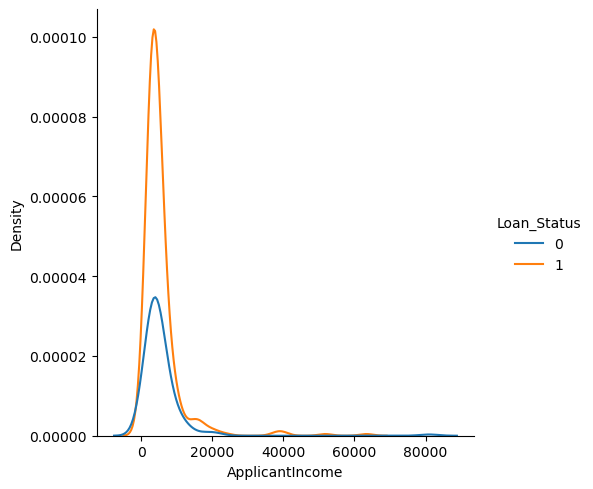

In [9]:
sns.displot(data=df, x="ApplicantIncome",hue=df["Loan_Status"],kind="kde")

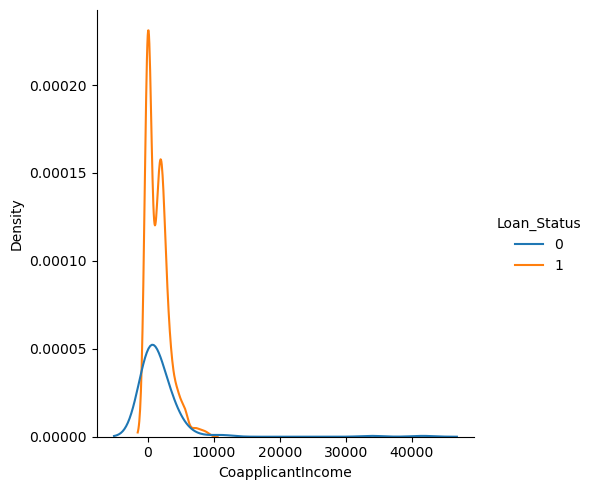

In [10]:
sns.displot(data=df, x="CoapplicantIncome",hue=df["Loan_Status"],kind="kde")

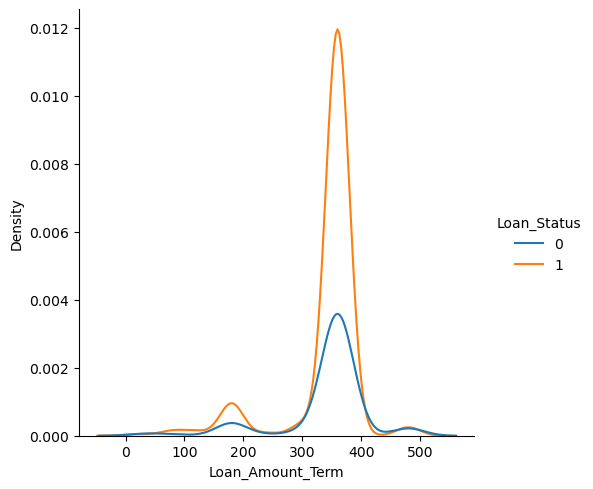

In [11]:
sns.displot(data=df, x="Loan_Amount_Term",hue=df["Loan_Status"],kind="kde")

In [93]:
X = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History"]]
y = df["Loan_Status"]

In [70]:
X.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

<Axes: ylabel='LoanAmount'>

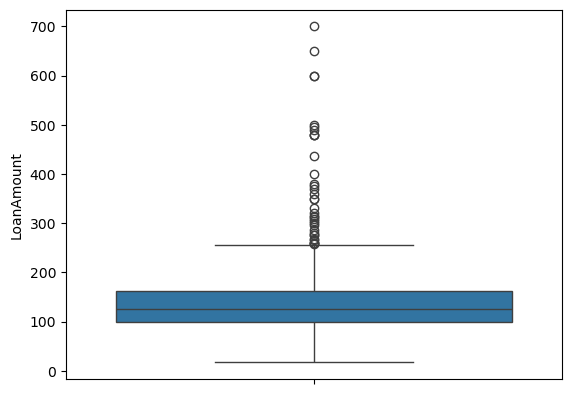

In [71]:
sns.boxplot(df["LoanAmount"])

In [72]:
med = X["LoanAmount"].median()
X.loc[:,"LoanAmount"] = X["LoanAmount"].fillna(med)

In [73]:
mod = X["Credit_History"].mode()[0]
X.loc[:,"Credit_History"] = X["Credit_History"].fillna(mod)

In [74]:
X.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
dtype: int64

In [75]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547,0.0,115.0,1.0
1,5703,0.0,130.0,1.0
2,4333,2451.0,110.0,1.0
3,4695,0.0,96.0,1.0
4,6700,1750.0,230.0,1.0
...,...,...,...,...
486,9833,1833.0,182.0,1.0
487,3812,0.0,112.0,1.0
488,14583,0.0,185.0,1.0
489,1836,33837.0,90.0,1.0


In [2]:
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2, stratify = y)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


lr = LogisticRegression()
lr.fit(X_train,y_train)

In [80]:
y_pred = lr.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [82]:
accuracy_score(y_test,y_pred)

0.8282828282828283

In [83]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[14, 16],
       [ 1, 68]], dtype=int64)

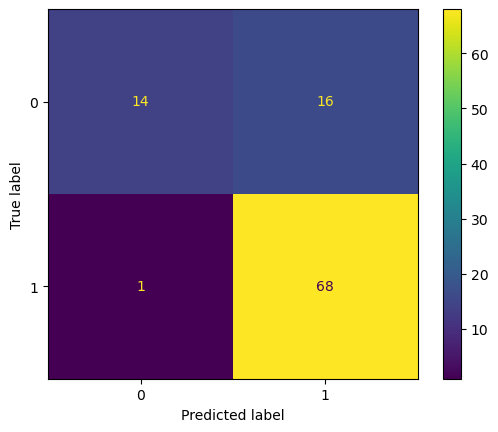

In [84]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [85]:
y_train.value_counts()

Loan_Status
1    274
0    118
Name: count, dtype: int64

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



In [87]:
dtc = DecisionTreeClassifier(random_state = 1, max_depth = 3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [88]:
dtc.score(X_test,y_test)

0.7878787878787878

In [89]:
dtc.score(X_train,y_train)

0.8239795918367347

[Text(0.4583333333333333, 0.875, 'Credit_History <= -1.047\ngini = 0.421\nsamples = 392\nvalue = [118, 274]'),
 Text(0.25, 0.625, 'LoanAmount <= 4.049\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.16666666666666666, 0.375, 'CoapplicantIncome <= 2.237\ngini = 0.142\nsamples = 52\nvalue = [48, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.111\nsamples = 51\nvalue = [48, 3]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'ApplicantIncome <= -0.603\ngini = 0.328\nsamples = 339\nvalue = [70, 269]'),
 Text(0.5, 0.375, 'LoanAmount <= 0.272\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8333333333333334, 0.375, 'CoapplicantIncome <= 0.008\ngini = 0.315\nsamples = 332\nvalue = [65, 267]'),
 Text

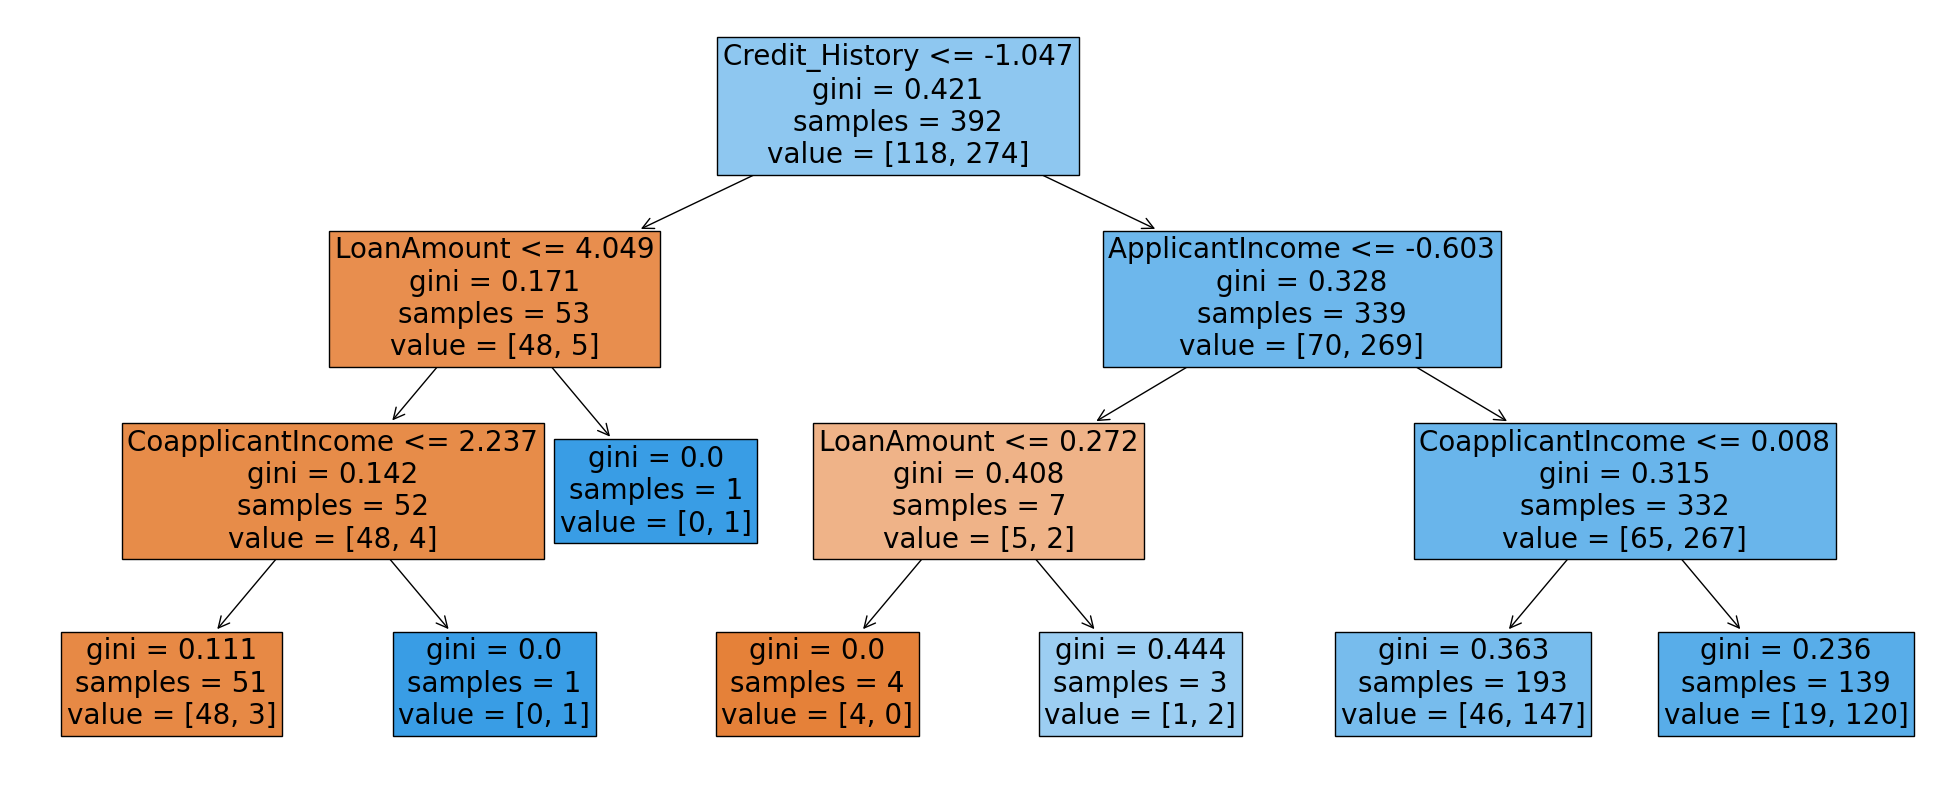

In [90]:
fig = plt.figure(figsize=(25,10))
plot_tree(dtc, feature_names = list(X.columns), filled = True, fontsize = 20)

In [91]:
X.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
dtype: int64

In [94]:
med = X["LoanAmount"].median()
X.loc[:,"LoanAmount"] = X["LoanAmount"].fillna(med)
med = X["Loan_Amount_Term"].median()
X.loc[:,"Loan_Amount_Term"] = X["Loan_Amount_Term"].fillna(med)
mod = X["Credit_History"].mode()[0]

X.loc[:,"Credit_History"] = X["Credit_History"].fillna(mod)
mod = X["Self_Employed"].mode()[0]
X.loc[:,"Self_Employed"] = X["Self_Employed"].fillna(mod)


In [5]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le = LabelEncoder()
X["Self_Employed"] = le.fit_transform(X["Self_Employed"])

C:\Users\PC\AppData\Local\Temp\ipykernel_21460\2815946682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Self_Employed"] = le.fit_transform(X["Self_Employed"])


In [97]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2, stratify = y)

In [99]:
lr.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred = lr.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred)

0.8282828282828283

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



## HANDLING MISSING VALUES USING TRANSFORMERS

In [6]:
X = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History"]]
y = df["Loan_Status"]

In [7]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547,0.0,115.0,1.0
1,5703,0.0,130.0,1.0
2,4333,2451.0,110.0,1.0
3,4695,0.0,96.0,1.0
4,6700,1750.0,230.0,1.0


In [8]:
X.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [10]:
knn_imputer = KNNImputer(n_neighbors = 5, weights = "distance")
X_new = knn_imputer.fit_transform(X)

In [11]:
X_df = pd.DataFrame(data = X_new, columns = X.columns, index = X.index)

In [12]:
X_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547.0,0.0,115.0,1.0
1,5703.0,0.0,130.0,1.0
2,4333.0,2451.0,110.0,1.0
3,4695.0,0.0,96.0,1.0
4,6700.0,1750.0,230.0,1.0


In [13]:
X_df["Credit_History"] = X_df["Credit_History"].apply(lambda x: 1 if x>0.65 else 0)


In [14]:
X_df["Credit_History"].unique()

array([1, 0], dtype=int64)

In [7]:
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_df)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2, stratify = y)

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.8383838383838383

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.50      0.65        30
           1       0.82      0.99      0.89        69

    accuracy                           0.84        99
   macro avg       0.88      0.74      0.77        99
weighted avg       0.86      0.84      0.82        99



In [26]:
dtc = DecisionTreeClassifier(random_state = 1, max_depth = 3)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.797979797979798

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        30
           1       0.80      0.94      0.87        69

    accuracy                           0.80        99
   macro avg       0.79      0.70      0.73        99
weighted avg       0.79      0.80      0.78        99



## USING ITERATIVE IMPUTER

In [52]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547,0.0,115.0,1.0
1,5703,0.0,130.0,1.0
2,4333,2451.0,110.0,1.0
3,4695,0.0,96.0,1.0
4,6700,1750.0,230.0,1.0
...,...,...,...,...
486,9833,1833.0,182.0,1.0
487,3812,0.0,112.0,1.0
488,14583,0.0,185.0,1.0
489,1836,33837.0,90.0,1.0


In [51]:
X = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History"]]

In [53]:
X.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

In [57]:
X_num = X.drop("Credit_History", axis = 1)
X_cat = X[["Credit_History"]]

In [58]:
it_num = IterativeImputer(initial_strategy = "mean")
X_num_new = it_num.fit_transform(X_num)

In [59]:
X_cat


,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
486,1.0
487,1.0
488,1.0
489,1.0


In [60]:
X_num_df = pd.DataFrame(data = X_num_new, columns = X_num.columns, index = X_num.index)
X_num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,4547.0,0.0,115.0
1,5703.0,0.0,130.0
2,4333.0,2451.0,110.0
3,4695.0,0.0,96.0
4,6700.0,1750.0,230.0
...,...,...,...
486,9833.0,1833.0,182.0
487,3812.0,0.0,112.0
488,14583.0,0.0,185.0
489,1836.0,33837.0,90.0


In [61]:
X_df = pd.concat([X_num_df,X_cat], axis = 1)
X_df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       43
dtype: int64

In [62]:
it_cat = IterativeImputer(initial_strategy = "most frequent")
X_df_new = it_num.fit_transform(X_df)

In [64]:
it_cat

IterativeImputer(initial_strategy='most frequent')

In [63]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_df_new)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2, stratify = y)

In [52]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.8282828282828283

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



In [68]:
## ENCODING CATEGORICAL

In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [106]:
df["Property_Area"].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [108]:
prop_oe = OrdinalEncoder(categories = [["Rural","Semiurban","Urban"]],
                        handle_unknown = "use_encoded_value",
                        unknown_value = -1)

In [111]:
prop_oe.fit_transform(df[["Property_Area"]])

array([[1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],

In [36]:
data = pd.read_csv(
    r"C:\Users\PC\Downloads\archive (4)\breast-cancer.data",na_values=("?"),
    header=None,
    names=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "Y"]
)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [10]:
for name in data.columns:
    print(name, data[name].unique())
    

X1 ['no-recurrence-events' 'recurrence-events']
X2 ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
X3 ['premeno' 'ge40' 'lt40']
X4 ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
X5 ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
X6 ['no' 'yes' '?']
X7 [3 2 1]
X8 ['left' 'right']
X9 ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Y ['no' 'yes']


In [132]:
# data = pd.get_dummies(data,dtype = "int")
# data

In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [12]:
le = LabelEncoder()
data["X1"] = le.fit_transform(data["X1"])
data["X8"] = le.fit_transform(data["X8"])
data["Y"] = le.fit_transform(data["Y"])

In [15]:
prop_oe = OrdinalEncoder(categories = [["premeno","ge40","lt40"]],
                        handle_unknown = "use_encoded_value",
                        unknown_value = -1)

In [16]:
 oetransform = prop_oe.fit_transform(data[["X3"]])



In [17]:
oetransform = pd.DataFrame(oetransform, index=data.index)

In [18]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
Y     0
dtype: int64

In [19]:
ohe = OneHotEncoder(handle_unknown = "ignore",
                   sparse_output = False).set_output(transform = "pandas")
ohetransform = ohe.fit_transform(data[["X2"]])

In [20]:
ohetransform

,X2_20-29,X2_30-39,X2_40-49,X2_50-59,X2_60-69,X2_70-79
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
281,0.0,1.0,0.0,0.0,0.0,0.0
282,0.0,1.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,1.0,0.0
284,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
data = pd.concat([data, ohetransform], axis = 1).drop(columns = "X2")


In [22]:
oetransform

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
281,0.0
282,0.0
283,1.0
284,1.0


In [23]:
data = pd.concat([data, oetransform], axis = 1).drop(columns = "X3")

In [24]:
data = data.rename(columns={0: 'X3'})
data

,X1,X4,X5,X6,X7,X8,X9,Y,X2_20-29,X2_30-39,X2_40-49,X2_50-59,X2_60-69,X2_70-79,X3
0,0,30-34,0-2,1,3,0,left_low,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20-24,0-2,1,2,1,right_up,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,20-24,0-2,1,2,0,left_low,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,15-19,0-2,1,2,1,left_up,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,0-4,0-2,1,2,1,right_low,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,30-34,0-2,1,2,0,left_up,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
282,1,20-24,0-2,1,3,0,left_up,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
283,1,20-24,0-2,1,1,1,left_up,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
284,1,30-34,3-5,1,3,0,left_low,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
ohetransform = ohe.fit_transform(data[["X4"]])


In [26]:
ohetransform2 = ohe.fit_transform(data[["X5"]])

In [27]:
data = pd.concat([data, ohetransform], axis = 1).drop(columns = "X4")

In [28]:
data = pd.concat([data, ohetransform2], axis = 1).drop(columns = "X5")

In [29]:
data

,X1,X6,X7,X8,X9,Y,X2_20-29,X2_30-39,X2_40-49,X2_50-59,...,X4_45-49,X4_5-9,X4_50-54,X5_0-2,X5_12-14,X5_15-17,X5_24-26,X5_3-5,X5_6-8,X5_9-11
0,0,1,3,0,left_low,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,2,1,right_up,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,0,left_low,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,1,left_up,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,2,1,right_low,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,0,left_up,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
282,1,1,3,0,left_up,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
283,1,1,1,1,left_up,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
284,1,1,3,0,left_low,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
it_cat = IterativeImputer(initial_strategy = "most_frequent")
data= it_cat.fit_transform(data)

ValueError: could not convert string to float: 'left_low'

In [13]:
data["X6"] = le.fit_transform(data["X6"])

In [14]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,0,30-39,premeno,30-34,0-2,1,3,0,left_low,0
1,0,40-49,premeno,20-24,0-2,1,2,1,right_up,0
2,0,40-49,premeno,20-24,0-2,1,2,0,left_low,0
3,0,60-69,ge40,15-19,0-2,1,2,1,left_up,0
4,0,40-49,premeno,0-4,0-2,1,2,1,right_low,0
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,1,2,0,left_up,0
282,1,30-39,premeno,20-24,0-2,1,3,0,left_up,1
283,1,60-69,ge40,20-24,0-2,1,1,1,left_up,0
284,1,40-49,ge40,30-34,3-5,1,3,0,left_low,0


In [31]:
prop_oe2 = OrdinalEncoder(categories = [["left_low","right_up","right_low","central"]],
                        handle_unknown = "use_encoded_value",
                        unknown_value = -1)

In [32]:
 oetransform2 = prop_oe2.fit_transform(data[["X9"]])

In [33]:
 oetransform2

array([[ 0.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 3.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [ 3.],
       [ 3.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 3.],
       [-1.],
       [ 1.],
       [-1.],
       [ 0.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 0.],
       [-1.],
       [-1.],
       [ 1.],
       [ 3.],
       [ 1.],
       [-1.],
       [-1.],
       [ 3.],
       [ 2.],
       [ 0.],
       [ 1.],
       [ 2.],
       [-1.],
       [ 2.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [39]:
mod = data["X6"].mode()[0]
data["X6"] = data["X6"].fillna(mod)